中枢
[(28.415, 21.402), (18.7151, 17.6177), (22.1308, 19.8057), (24.2808, 22.7428), (17.9456, 16.7872), (21.7611, 18.8029), (18.4413, 15.2425), (34.185, 30.8015), (29.3338, 27.1002), (25.2737, 23.1295), (22.6332, 19.7742), (15.55, 14.2), (21.69, 18.4), (13.73, 13.2)]
记录中枢
[1, 8, 13, 31, 34, 43, 46, 53, 64, 72, 76, 82, 87, 90]


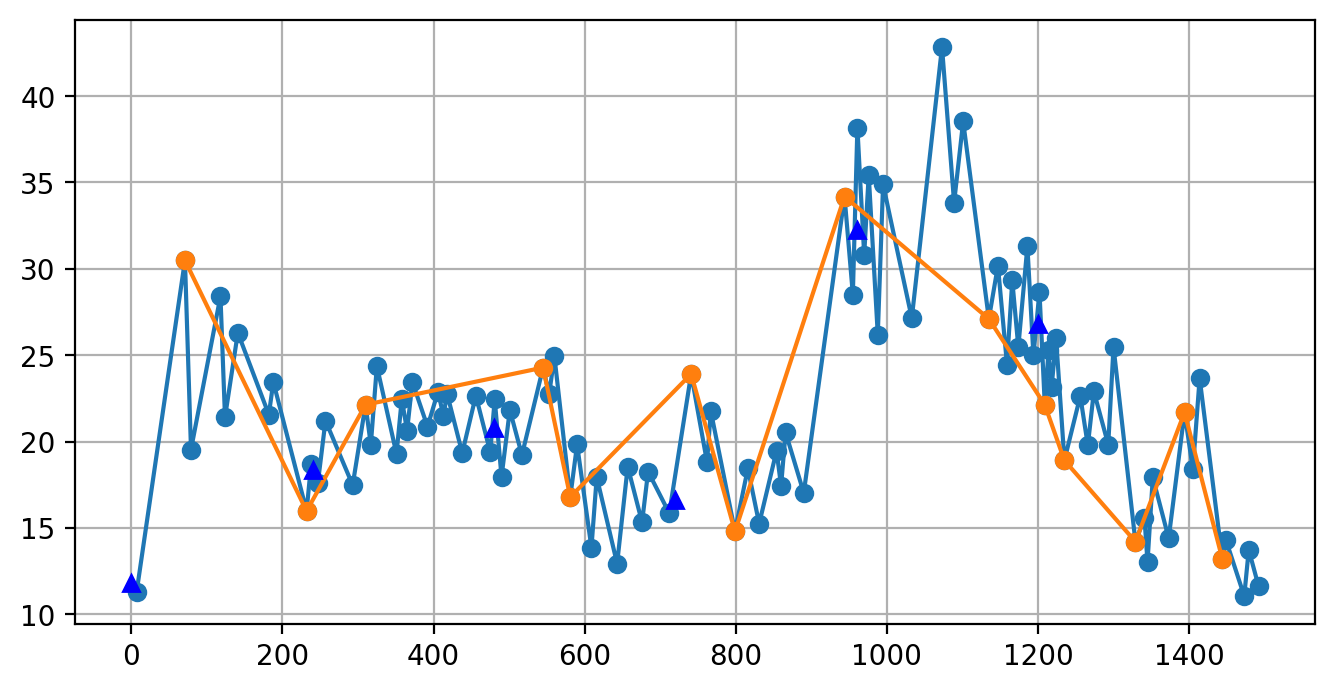

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  1 18:19:56 2018
缠论代码
@author: Everyheart
"""
import tushare as ts
#%%
from chanlun import data,hebin0, hebin1,fenbi,fenbi1,tt1,zhongshu

#===========================================================================
df=ts.pro_bar(ts_code='002624.SZ', asset='E',adj='qfq', start_date='20150101', end_date="20220427", freq='D')
df=df.sort_values('trade_date', ascending=True)
# df['datetime']=pd.to_datetime(df['trade_date'], format='%Y%m%d')
# df=df.set_index('datetime')
# print(df)

#===========================================================================
#（2）K线的合并操作
H,L=hebin0(df)
H1=list(H)
L1=list(L)
#H,L分别是合并后的K线的最高和最低点
#===========================================================================
#（3）合并的第二部分
H,L,jl=hebin1(H,L)
#这里的H,L是合并后删除相同的内容弄后的K线，JL是删除的K线的位置
#===========================================================================
#（4）分笔操作
T,W,Q,GG,DD=fenbi(H,L)
#这里是分笔的操作，最后的T,t是合并后的顶分型底分型的位置（这里依然是删除同样k线后的位置，而W是点位，Q是这一笔向上还是向下
#这里的Q的第一笔并不能算笔，是起点到第一个分型的情况。
#GG，DD分别是走势进行划分，笔的顶点顶分型是GG中，而底分型在DD中
T11,W11,Q11,xin,yin,GG11,DD11=fenbi1(H,L,T,W,Q,GG,DD)
T0=tt1(jl,T11)#经过tt1处理后，得到删除前其所在的位置，这里的JL是删除的内容，
#得到的结果是T0是所有的顶分型与底分型的位置

#这里是对于最后一个的情况进行处理，xin，yin 是最后一个分型的位置和最后一个点位。
#===========================================================================
#（5）中枢的确定和计录
#%
#这个的作用就是对于可能出现的最后一个有，是向上的但是没有加入，这样会影响中枢的判断，因此这里需要加上向上的
if Q[-1]==-1:
    GG11.append(yin)
else:
    DD11.append(yin)
#利用这个函数找到中枢，与中枢构建的第一个分型    
ZS,JLZS=zhongshu(Q11,GG11,DD11)
print("中枢")
print(ZS)
print("记录中枢")
print(JLZS)
#ZS中记录了所有中枢的价格区间，而JSZS记录了中枢形成的第一个边的位置信息，这里的位置是这里的第i个笔（可能上升可能下跌），注意引索也是从0开始，
#%%
#画出图来
c=tt1(jl,[xin])[0]#这里将最后一个也加上，从而画出图
T0.append(c)
W11.append(yin)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4), dpi=200)
plt.plot(T0,W11,'-o')
#%%
#这里是画出所有的中枢开始的分型的位置
W12=[]
JLZS1=[]
for i in JLZS:
    W12.append(W11[i])
    JLZS1.append(T0[i])
    
plt.plot(JLZS1,W12,'-o')
#%%
#日期分割
I=[]
P=[]
lx=240#这里如果是1min的数据就是240，如果是5分钟就是48，
for i in range(int(len(df)/lx)):
    I.append(lx*i)
    P.append(df.iloc[lx*i,2])
plt.plot(I,P,'b^')

print("记录中枢")
print(JLZS)
plt.grid()




